# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Arsal Ranjana Utama
- **Email:** m119b4ky2745@bangkit.academy
- **ID Dicoding:** arsalutama

## Menentukan Pertanyaan Analisis

1. Pertanyaan 1: Bagaimana perbandingan kadar polutan di stasiun-stasiun ?



2. Pertanyaan 2: Bagaimana tren tahunan konsentrasi PM2.5 dan PM10?


3. Pertanyaan 3: Apakah hujan (RAIN) memiliki dampak pada konsentrasi polutan udara?


## Import Semua Packages/Library yang Digunakan

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

## Data Wrangling

### Gathering Data

Mount Data dari Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Data

In [67]:
# Daftar file path
file_paths = [
    "/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_Changping_20130301-20170228.csv",
    "/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_Dingling_20130301-20170228.csv",
    "/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_Dongsi_20130301-20170228.csv",
    "/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_Guanyuan_20130301-20170228.csv",
    "/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_Gucheng_20130301-20170228.csv",
    "/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_Huairou_20130301-20170228.csv",
    "/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_Shunyi_20130301-20170228.csv",
    "/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_Tiantan_20130301-20170228.csv",
    "/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_Wanliu_20130301-20170228.csv",
    "/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

# Fungsi untuk memuat dan membuat variabel dataframe secara dinamis
dataframes = {}

for file_path in file_paths:
    # Ekstraksi nama stasiun dari nama file
    station_name = file_path.split("_")[2]

    # Membaca file CSV dan menyimpannya ke dalam dictionary
    dataframes[f'df_{station_name}'] = pd.read_csv(file_path)


In [68]:
# Akses data untuk setiap stasiun
df_Aotizhongxin = dataframes['df_Aotizhongxin']
df_Changping = dataframes['df_Changping']
df_Dingling = dataframes['df_Dingling']
df_Dongsi = dataframes['df_Dongsi']
df_Guanyuan = dataframes['df_Guanyuan']
df_Gucheng = dataframes['df_Gucheng']
df_Huairou = dataframes['df_Huairou']
df_Nongzhanguan = dataframes['df_Nongzhanguan']
df_Shunyi = dataframes['df_Shunyi']
df_Tiantan = dataframes['df_Tiantan']
df_Wanliu = dataframes['df_Wanliu']
df_Wanshouxigong = dataframes['df_Wanshouxigong']

**Insight:**
- Data Keseluruhan dari 12 Stasiun Berjumlah 420768 baris *(35064 x 12)*

### Assessing Data

> Ambil Satu Sampel Dataset Untuk Melakukan Asesmen


In [70]:
df_Aotizhongxin.head(100)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


In [71]:
df_Aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


> Terdapat Nilai NA pada Data

In [72]:
# Mengecek jumlah nilai yang hilang pada setiap kolom
df_Aotizhongxin.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


> Terlihat banyak nilai NA pada atribute **PM2.5**, **PM10**,	**SO2**,	**NO2**,	**CO**,	**O3**,	**TEMP**,	**PRES**,	**DEWP**,	**RAIN**,	**wd**,	**WSPM**

In [73]:
# Menampilkan semua baris yang memiliki nilai yang hilang
null_values_df = df_Aotizhongxin[df_Aotizhongxin.isnull().any(axis=1)]

# Menampilkan dataframe dengan nilai yang hilang
null_values_df.head(100)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
74,75,2013,3,4,2,34.0,62.0,NaN,14.0000,300.0,68.0000,8.1,1016.7,-11.8,0.0,N,4.3,Aotizhongxin
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0000,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
76,77,2013,3,4,4,7.0,18.0,14.0000,NaN,400.0,42.0000,6.0,1018.0,-11.6,0.0,NNW,1.0,Aotizhongxin
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0000,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
170,171,2013,3,8,2,339.0,400.0,NaN,162.0000,3899.0,84.0000,2.5,998.2,-1.9,0.0,SW,0.8,Aotizhongxin
171,172,2013,3,8,3,324.0,373.0,71.0000,154.0000,NaN,84.0000,1.8,997.9,-1.8,0.0,N,0.0,Aotizhongxin
172,173,2013,3,8,4,322.0,345.0,62.0000,NaN,3299.0,84.0000,1.3,998.5,-1.8,0.0,W,1.0,Aotizhongxin
178,179,2013,3,8,10,326.0,844.0,125.9496,179.2269,NaN,84.0000,19.1,1000.9,-0.4,0.0,SSW,1.9,Aotizhongxin
204,205,2013,3,9,12,78.0,NaN,10.0000,10.0000,300.0,68.0000,12.4,1004.3,-14.4,0.0,NW,7.9,Aotizhongxin
267,268,2013,3,12,3,117.0,127.0,73.0000,81.0000,NaN,47.0000,6.4,1005.8,-1.0,0.1,N,2.2,Aotizhongxin


**Insight:**
- Terdapat banyak nilai missing (NA) pada data sampel, sehingga dapat diasumsikan bahwa keseluruhan dataset juga memiliki jumlah nilai NA yang signifikan.
- Nilai yang hilang cenderung muncul secara berurutan, mengikuti pola sekuensial dari data sebelumnya.
- Mengingat banyaknya nilai NA dan pola sekuensial dari data yang hilang, diputuskan untuk melakukan interpolasi guna menggantikan nilai-nilai yang hilang tersebut.

### Cleaning Data

In [74]:
dataframes = {
    'df_Aotizhongxin': df_Aotizhongxin,
    'df_Changping': df_Changping,
    'df_Dingling': df_Dingling,
    'df_Dongsi': df_Dongsi,
    'df_Guanyuan': df_Guanyuan,
    'df_Gucheng': df_Gucheng,
    'df_Huairou': df_Huairou,
    'df_Nongzhanguan': df_Nongzhanguan,
    'df_Shunyi': df_Shunyi,
    'df_Tiantan': df_Tiantan,
    'df_Wanliu': df_Wanliu,
    'df_Wanshouxigong': df_Wanshouxigong,
}


for name, df in dataframes.items():
    # Buat kolom 'date'
    df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

    # nterpolasi nilai yang hilang untuk kolom bertipe float
    float_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
    df[float_cols] = df[float_cols].interpolate(method='linear')

    # Isi nilai yang hilang di kolom 'wd' menggunakan forward fill dan backward fill
    df['wd'] = df['wd'].fillna(method='ffill')  # Forward fill
    df['wd'] = df['wd'].fillna(method='bfill')  # Backward fill

    # Menyusun ulang DataFrame agar kolom 'date' berada setelah 'No'
    cols = df.columns.tolist()
    cols = df.columns.tolist()
    new_order = ['No', 'date'] + [col for col in cols if col not in ['No', 'date']]
    df = df[new_order]

    # Hapus kolom asli
    df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

    # Ganti nama DataFrame sesuai konvensi df_<nama_kota>_cleaned
    cleaned_data_name = f"df_{name.split('_')[1]}_cleaned"
    locals()[cleaned_data_name] = df

    # Cek DataFrame yang telah diperbarui
    print(f"{cleaned_data_name} - Updated DataFrame Info:")
    print(df.info())

<ipython-input-74-b2df9dd19f66>:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='ffill')  # Forward fill
<ipython-input-74-b2df9dd19f66>:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='bfill')  # Backward fill
<ipython-input-74-b2df9dd19f66>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
<ipython-input-74-b2df9dd19f66>:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='

df_Aotizhongxin_cleaned - Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   PM2.5    35064 non-null  float64       
 3   PM10     35064 non-null  float64       
 4   SO2      35064 non-null  float64       
 5   NO2      35064 non-null  float64       
 6   CO       35064 non-null  float64       
 7   O3       35064 non-null  float64       
 8   TEMP     35064 non-null  float64       
 9   PRES     35064 non-null  float64       
 10  DEWP     35064 non-null  float64       
 11  RAIN     35064 non-null  float64       
 12  wd       35064 non-null  object        
 13  WSPM     35064 non-null  float64       
 14  station  35064 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.

<ipython-input-74-b2df9dd19f66>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
<ipython-input-74-b2df9dd19f66>:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='ffill')  # Forward fill
<ipython-input-74-b2df9dd19f66>:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='bfill')  # Backward fill
<ipython-input-74-b2df9dd19f66>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

df_Guanyuan_cleaned - Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   PM2.5    35064 non-null  float64       
 3   PM10     35064 non-null  float64       
 4   SO2      35064 non-null  float64       
 5   NO2      35064 non-null  float64       
 6   CO       35064 non-null  float64       
 7   O3       35064 non-null  float64       
 8   TEMP     35064 non-null  float64       
 9   PRES     35064 non-null  float64       
 10  DEWP     35064 non-null  float64       
 11  RAIN     35064 non-null  float64       
 12  wd       35064 non-null  object        
 13  WSPM     35064 non-null  float64       
 14  station  35064 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ M

<ipython-input-74-b2df9dd19f66>:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='ffill')  # Forward fill
<ipython-input-74-b2df9dd19f66>:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='bfill')  # Backward fill
<ipython-input-74-b2df9dd19f66>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
<ipython-input-74-b2df9dd19f66>:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='

df_Shunyi_cleaned - Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   No       35064 non-null  int64         
 1   date     35064 non-null  datetime64[ns]
 2   PM2.5    35064 non-null  float64       
 3   PM10     35064 non-null  float64       
 4   SO2      35064 non-null  float64       
 5   NO2      35064 non-null  float64       
 6   CO       35064 non-null  float64       
 7   O3       35064 non-null  float64       
 8   TEMP     35064 non-null  float64       
 9   PRES     35064 non-null  float64       
 10  DEWP     35064 non-null  float64       
 11  RAIN     35064 non-null  float64       
 12  wd       35064 non-null  object        
 13  WSPM     35064 non-null  float64       
 14  station  35064 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ MB


<ipython-input-74-b2df9dd19f66>:26: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='ffill')  # Forward fill
<ipython-input-74-b2df9dd19f66>:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='bfill')  # Backward fill
<ipython-input-74-b2df9dd19f66>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)


> Melihat nama dataframe yang dihasilkan

In [75]:
cleaned_data_names = [f"df_{name.split('_')[1]}_cleaned" for name in dataframes.keys()]

# Print cleaned DataFrame names
for cleaned_name in cleaned_data_names:
    print(cleaned_name)

df_Aotizhongxin_cleaned
df_Changping_cleaned
df_Dingling_cleaned
df_Dongsi_cleaned
df_Guanyuan_cleaned
df_Gucheng_cleaned
df_Huairou_cleaned
df_Nongzhanguan_cleaned
df_Shunyi_cleaned
df_Tiantan_cleaned
df_Wanliu_cleaned
df_Wanshouxigong_cleaned


> Menggabungkan Semua Data Menjadi Satu

In [76]:
cleaned_dataframes = [
  df_Aotizhongxin_cleaned,
  df_Changping_cleaned,
  df_Dingling_cleaned,
  df_Dongsi_cleaned,
  df_Guanyuan_cleaned,
  df_Gucheng_cleaned,
  df_Huairou_cleaned,
  df_Nongzhanguan_cleaned,
  df_Shunyi_cleaned,
  df_Tiantan_cleaned,
  df_Wanliu_cleaned,
  df_Wanshouxigong_cleaned
]

# Menggabungkan semua dataframe menjadi satu
merged_cleaned_data = pd.concat(cleaned_dataframes, ignore_index=True)


In [77]:
merged_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   date     420768 non-null  datetime64[ns]
 2   PM2.5    420768 non-null  float64       
 3   PM10     420768 non-null  float64       
 4   SO2      420768 non-null  float64       
 5   NO2      420746 non-null  float64       
 6   CO       420768 non-null  float64       
 7   O3       420768 non-null  float64       
 8   TEMP     420768 non-null  float64       
 9   PRES     420768 non-null  float64       
 10  DEWP     420768 non-null  float64       
 11  RAIN     420768 non-null  float64       
 12  wd       420768 non-null  object        
 13  WSPM     420768 non-null  float64       
 14  station  420768 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 48.2+ MB


> Cek Nilai NA pada dataset yang sudah tergabung

In [78]:
# Check for NA values in the merged DataFrame
na_values = merged_cleaned_data.isnull().sum()
print(na_values)

No          0
date        0
PM2.5       0
PM10        0
SO2         0
NO2        22
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
dtype: int64


> Ternyata masih ada data yang Null, Oleh karena itu kita teliti lebih lanjut

In [79]:
# Cek data yang mengandung NA pada kolum NO2
no2_null_entries = merged_cleaned_data[merged_cleaned_data['NO2'].isnull()]

# Display data
no2_null_entries

,No,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
70128,1,2013-03-01 00:00:00,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
70129,2,2013-03-01 01:00:00,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
175320,1,2013-03-01 00:00:00,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
175321,2,2013-03-01 01:00:00,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
175322,3,2013-03-01 02:00:00,5.0,18.0,5.5,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
175323,4,2013-03-01 03:00:00,6.0,20.0,6.0,NaN,650.0,62.5,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
175324,5,2013-03-01 04:00:00,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng
175325,6,2013-03-01 05:00:00,4.0,11.0,3.0,NaN,700.0,87.0,-1.8,1023.6,-21.9,0.0,E,1.2,Gucheng
175326,7,2013-03-01 06:00:00,3.0,6.0,3.0,NaN,700.0,92.0,-2.6,1024.3,-20.4,0.0,ENE,1.2,Gucheng
175327,8,2013-03-01 07:00:00,5.0,5.0,3.0,NaN,800.0,86.0,-0.9,1025.6,-20.5,0.0,ENE,1.1,Gucheng


>Berdasarkan analisis data yang hilang, dapat diasumsikan bahwa hilangnya data disebabkan oleh kerusakan sensor alat, karena pola data yang hilang cenderung berurutan dengan data sebelumnya.

<br>

>Oleh karena itu, saya memutuskan untuk mengganti data yang hilang dengan menggunakan interpolasi dari nilai tetangga terdekat.

In [80]:
merged_cleaned_data['NO2'] = merged_cleaned_data['NO2'].fillna(method='ffill')  # Forward fill
merged_cleaned_data['NO2'] = merged_cleaned_data['NO2'].fillna(method='bfill')  # Backward fill

merged_cleaned_data['NO2'] = merged_cleaned_data['NO2'].interpolate(method='linear')

merged_cleaned_data.isnull().sum()

<ipython-input-80-22cd4d3768fa>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_cleaned_data['NO2'] = merged_cleaned_data['NO2'].fillna(method='ffill')  # Forward fill
<ipython-input-80-22cd4d3768fa>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_cleaned_data['NO2'] = merged_cleaned_data['NO2'].fillna(method='bfill')  # Backward fill


,0
No,0
date,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0


In [81]:
merged_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   No       420768 non-null  int64         
 1   date     420768 non-null  datetime64[ns]
 2   PM2.5    420768 non-null  float64       
 3   PM10     420768 non-null  float64       
 4   SO2      420768 non-null  float64       
 5   NO2      420768 non-null  float64       
 6   CO       420768 non-null  float64       
 7   O3       420768 non-null  float64       
 8   TEMP     420768 non-null  float64       
 9   PRES     420768 non-null  float64       
 10  DEWP     420768 non-null  float64       
 11  RAIN     420768 non-null  float64       
 12  wd       420768 non-null  object        
 13  WSPM     420768 non-null  float64       
 14  station  420768 non-null  object        
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 48.2+ MB


> Sekarang Data sudah bersih dan sudah siap untuk masuk ke tahap selanjutnya

In [103]:
merged_cleaned_data.to_csv("merged_cleaned_data.csv")

## Exploratory Data Analysis (EDA)

### Explore ...

#### Statistic Description

Air Quality Index

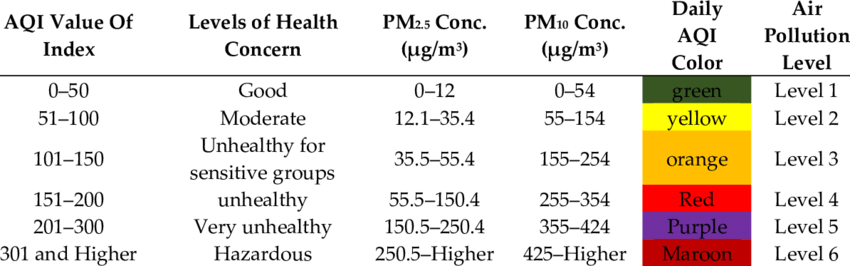

Credit :

```
@article{article,
author = {Wambebe, Nathaniel and Duan, Xiaoli},
year = {2020},
month = {08},
pages = {817},
title = {Air Quality Levels and Health Risk Assessment of Particulate Matters in Abuja Municipal Area, Nigeria},
volume = {11},
journal = {Atmosphere},
doi = {10.3390/atmos11080817}
}
```



> Melihat Statistik Deskripsi Untuk Keseluruhan Data

In [82]:
# Menampilkan nilai statistik deskripsi untuk keseluruhan data
merged_cleaned_data.describe()


,No,date,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2015-03-01 11:30:00.000001024,79.839718,104.910268,15.913090,50.601423,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034
min,1.000000,2013-03-01 00:00:00,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014-03-01 05:45:00,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015-03-01 11:30:00,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26298.250000,2016-02-29 17:15:00,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017-02-28 23:00:00,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000
std,10122.116943,NaN,80.950217,92.431422,21.896609,35.170395,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674


**Insight:**
- Rata-rata PM2.5 menunjukkan angka sebesar 79.839, yang menurut grafik Indeks Kualitas Udara (Air Quality Index) sudah termasuk dalam kategori "Tidak Sehat" (Unhealthy). Hal ini mengindikasikan bahwa kualitas udara di area tersebut dapat berdampak negatif pada kesehatan, terutama bagi kelompok rentan seperti anak-anak, orang tua, dan individu dengan kondisi pernapasan.
<br><br>
- Rata-rata PM10 menunjukkan angka sebesar 104.910, yang menurut grafik Indeks Kualitas Udara (Air Quality Index) termasuk dalam kategori "Sedang" (Moderate). Meskipun masih dalam batas aman untuk sebagian besar populasi, paparan jangka panjang terhadap tingkat PM10 yang tinggi dapat mempengaruhi kesehatan pernapasan dan meningkatkan risiko penyakit.



> Melihat Statistik Deskripsi Per Stasiun

In [83]:
station_statistics = merged_cleaned_data.groupby('station').describe()
styled_statistics = station_statistics.style.set_sticky()
styled_statistics


> Analisis Lebih Detail Terhadap Stasiun Akan Dibahas Lebih Lanjut Pada Visualization & Explanatory Analysis

#### Distribusi Data

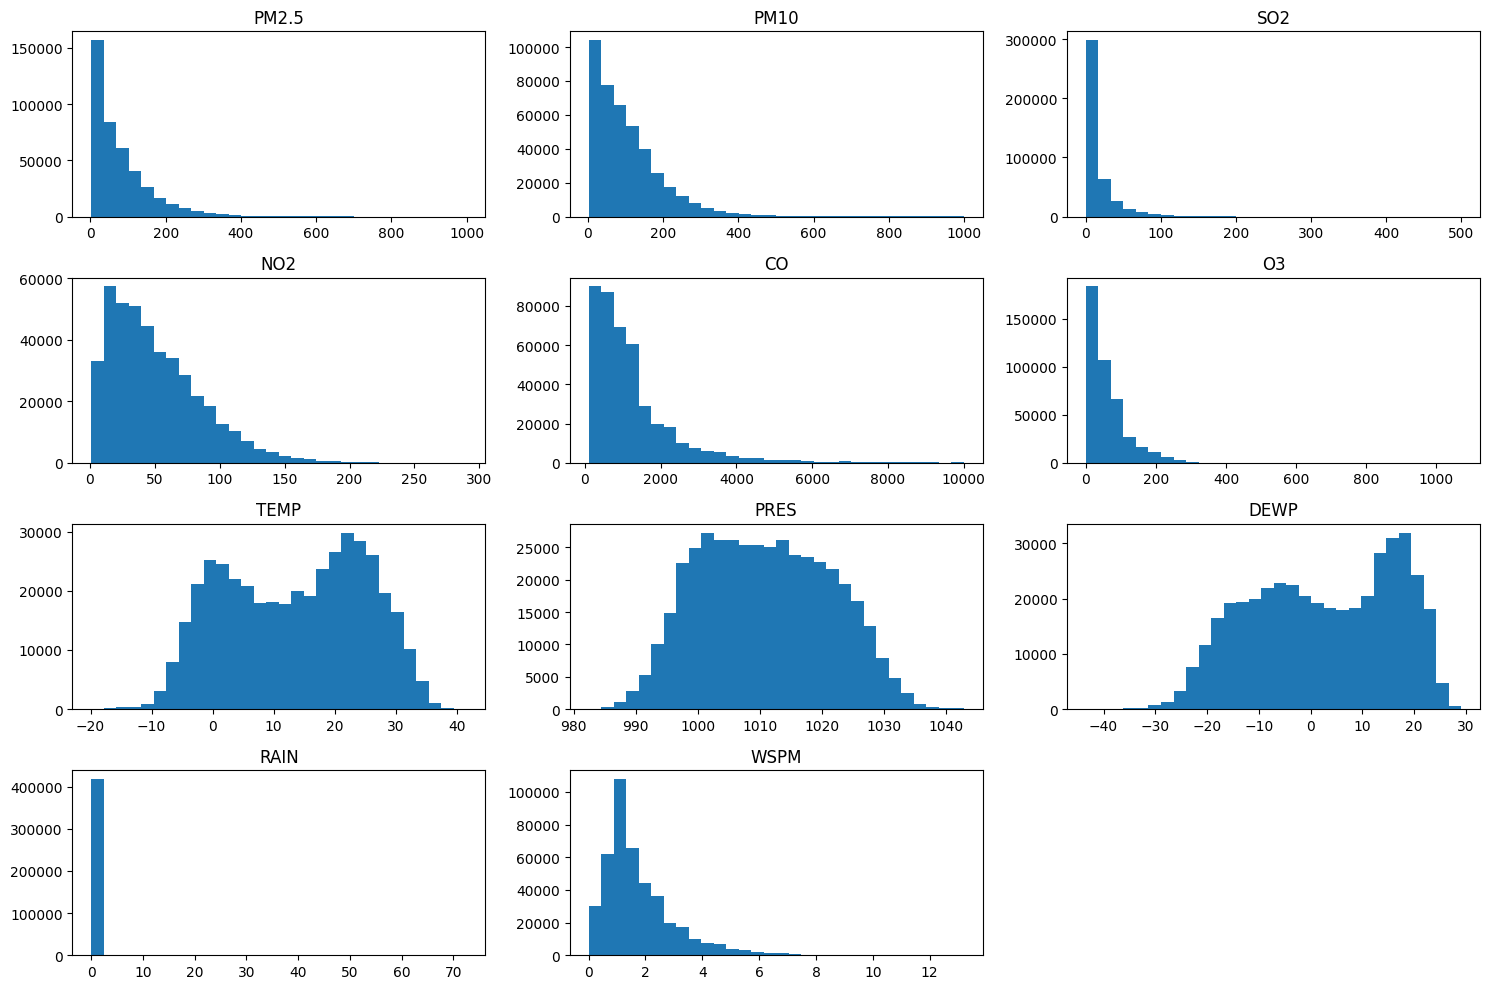

In [84]:
numeric_columns = merged_cleaned_data.drop(columns=['No', 'date']).select_dtypes(include='number')

numeric_columns.hist(bins=30, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

**Insight:**
- Sebagian besar data menunjukkan distribusi "Right-Skewed," di mana nilai-nilai cenderung terdistribusi lebih banyak pada sisi kiri dengan ekor yang menjulur ke arah kanan, mengindikasikan bahwa nilai ekstrem yang tinggi hanya muncul sesekali, yang mungkin mencerminkan bahwa tingkat polusi udara di lokasi tersebut masih dalam batas normal.

#### Correlation Matrix

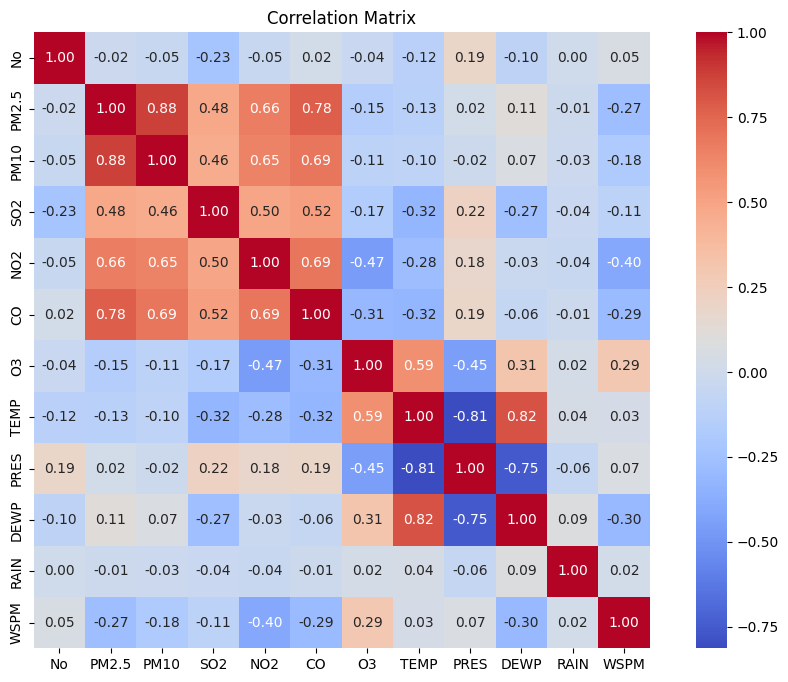

In [85]:
numeric_data = merged_cleaned_data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [86]:
correlation_matrix

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,-0.024719,-0.047232,-0.227029,-0.047150,0.019026,-0.040679,-0.122671,0.188618,-0.102117,0.004812,0.054354
PM2.5,-0.024719,1.000000,0.878874,0.478223,0.664285,0.780165,-0.149508,-0.131607,0.019862,0.113045,-0.014452,-0.271425
PM10,-0.047232,0.878874,1.000000,0.460572,0.645559,0.691887,-0.110443,-0.096078,-0.018375,0.067674,-0.026505,-0.178200
SO2,-0.227029,0.478223,0.460572,1.000000,0.495817,0.522678,-0.165311,-0.320237,0.221235,-0.266121,-0.040028,-0.108536
NO2,-0.047150,0.664285,0.645559,0.495817,1.000000,0.694033,-0.465903,-0.277314,0.176699,-0.032625,-0.043669,-0.395692
CO,0.019026,0.780165,0.691887,0.522678,0.694033,1.000000,-0.306979,-0.324057,0.188045,-0.060315,-0.013281,-0.290413
O3,-0.040679,-0.149508,-0.110443,-0.165311,-0.465903,-0.306979,1.000000,0.592248,-0.446725,0.312980,0.023361,0.294351
TEMP,-0.122671,-0.131607,-0.096078,-0.320237,-0.277314,-0.324057,0.592248,1.000000,-0.813312,0.820247,0.037647,0.032601
PRES,0.188618,0.019862,-0.018375,0.221235,0.176699,0.188045,-0.446725,-0.813312,1.000000,-0.750271,-0.060952,0.065400
DEWP,-0.102117,0.113045,0.067674,-0.266121,-0.032625,-0.060315,0.312980,0.820247,-0.750271,1.000000,0.086259,-0.296771


**Insight:**
- PM2.5 dan PM10: Korelasi sangat tinggi (0.88), menunjukkan keterkaitan kuat antara keduanya.
- NO2 dan SO2: Korelasi positif (0.50), menunjukkan hubungan antara keduanya.
- Suhu (TEMP): Negatif dengan PM2.5, PM10, SO2, dan NO2, menunjukkan bahwa peningkatan suhu dapat mengurangi polutan.
- Tekanan (PRES): Negatif kuat dengan TEMP (-0.81), menunjukkan hubungan antara suhu dan tekanan atmosfer.
- Kelembapan (DEWP): Negatif dengan NO2 dan SO2, menunjukkan bahwa kelembapan tinggi dapat menurunkan kadar polutan.
- Curah Hujan (RAIN): Tidak menunjukkan korelasi signifikan dengan polutan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbandingan kadar polutan di stasiun-stasiun ?

  *  Dengan 12 stasiun pemantauan. Apakah beberapa stasiun selalu menunjukkan kualitas udara yang lebih buruk dibandingkan yang lain?

In [95]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

station_averages = merged_cleaned_data.groupby('station')[pollutants].mean().reset_index()

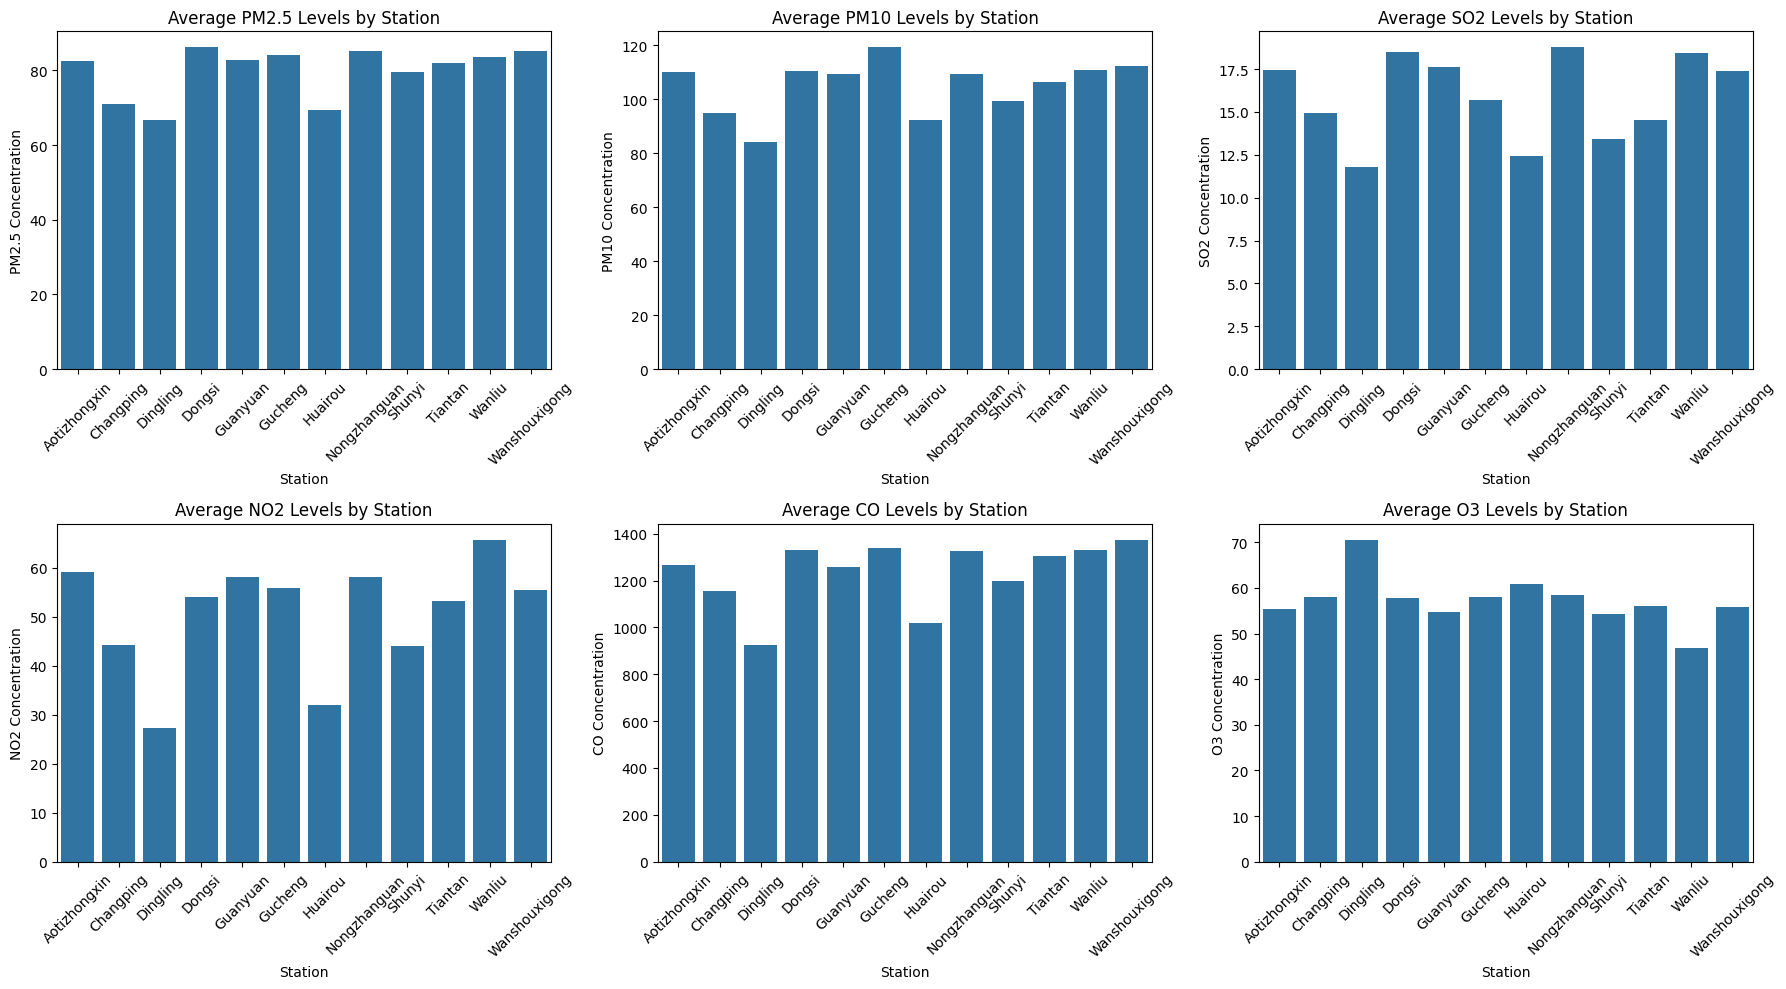

In [96]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes = axes.flatten()

for idx, pollutant in enumerate(pollutants):
    sns.barplot(x='station', y=pollutant, data=station_averages, ax=axes[idx])
    axes[idx].set_title(f'Average {pollutant} Levels by Station')
    axes[idx].set_xlabel('Station')
    axes[idx].set_ylabel(f'{pollutant} Concentration')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [97]:
station_averages['AQI'] = station_averages[pollutants].mean(axis=1)

worst_stations = station_averages.sort_values('AQI', ascending=False)

print("Stations ranked by overall air quality (worst to best):")
print(worst_stations[['station', 'AQI']])

Stations ranked by overall air quality (worst to best):
          station         AQI
11  Wanshouxigong  283.328441
5         Gucheng  278.498657
3          Dongsi  276.427414
7    Nongzhanguan  276.253189
10         Wanliu  275.653993
9         Tiantan  269.636726
0    Aotizhongxin  264.884174
4        Guanyuan  263.527111
8          Shunyi  248.062339
1       Changping  239.981789
6         Huairou  214.498736
2        Dingling  197.617470


**Insight :**

- Kualitas Udara yang Buruk di Stasiun Tertentu: Stasiun Wanshouxigong memiliki Indeks Kualitas Udara (AQI) tertinggi, yaitu 283.33, menandakan kondisi polusi yang sangat buruk. Stasiun Gucheng dan Dongsi juga berada di urutan teratas dengan AQI masing-masing 278.50 dan 276.43.

- Fluktuasi Level Polutan: Level polutan PM2.5 dan PM10 dan polutan lainnya menunjukkan fluktuasi yang signifikan antar stasiun. Hal ini mengindikasikan bahwa faktor lingkungan dan manusia dapat berkontribusi terhadap variasi konsentrasi polutan di udara. Oleh karena itu, saya menambahkan analisis geospasial untuk memahami lebih dalam mengenai kondisi stasiun-stasiun ini.

### Pertanyaan 2: Bagaimana tren tahunan konsentrasi PM2.5 dan PM10?

- Analisis ini akan melihat apakah tingkat polutan partikel halus meningkat, menurun, atau tetap konstan dari tahun ke tahun, yang dapat memberikan gambaran jangka panjang tentang kualitas udara.

   year      PM2.5        PM10
0  2013  79.768553  103.199397
1  2014  86.183671  116.821115
2  2015  79.306423  103.655023
3  2016  72.078419   94.751717
4  2017  92.407898  110.880797


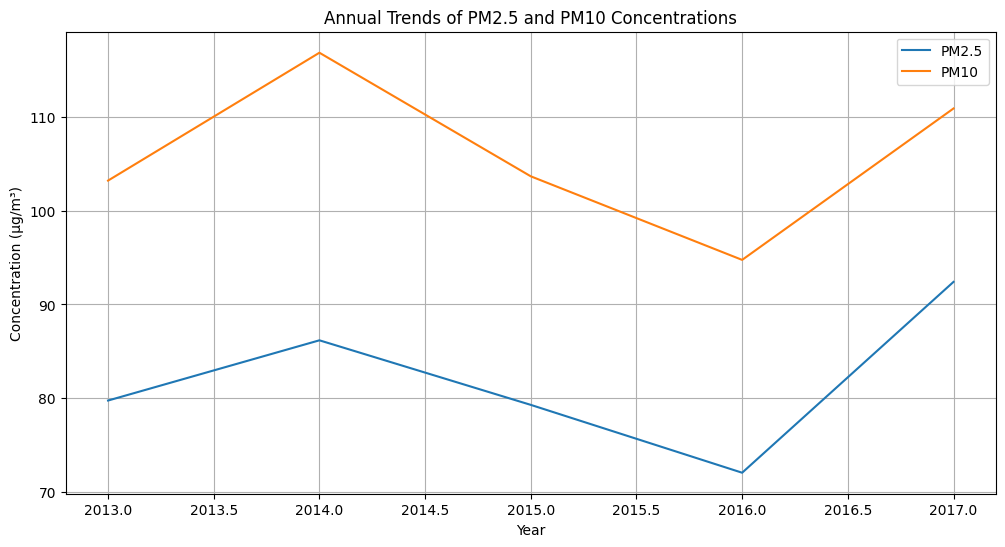

In [50]:
merged_cleaned_data['year'] = merged_cleaned_data['date'].dt.year

annual_pm = merged_cleaned_data.groupby('year')[['PM2.5', 'PM10']].mean().reset_index()

print(annual_pm)

plt.figure(figsize=(12, 6))
plt.plot(annual_pm['year'], annual_pm['PM2.5'], label='PM2.5')
plt.plot(annual_pm['year'], annual_pm['PM10'], label='PM10')
plt.xlabel('Year')
plt.ylabel('Concentration (μg/m³)')
plt.title('Annual Trends of PM2.5 and PM10 Concentrations')
plt.legend()
plt.grid(True)
plt.show()

**Insight** :
- Fluktuasi dan Tren Umum: Data menunjukkan fluktuasi signifikan dalam konsentrasi PM2.5 dan PM10 selama periode lima tahun, dengan puncak tertinggi terjadi pada tahun 2014. Konsentrasi PM2.5 menurun menjadi terendah pada tahun 2016 (72.08 µg/m³), tetapi kemudian meningkat kembali pada tahun 2017 (92.41 µg/m³).

- Perbandingan dan Dampak Kesehatan: Secara konsisten, konsentrasi PM2.5 lebih tinggi dibandingkan dengan PM10, menandakan bahwa partikel halus lebih dominan di lingkungan. Tingginya kadar PM2.5, yang berpotensi berdampak lebih besar pada kesehatan, menunjukkan perlunya perhatian lebih dalam pemantauan dan pengendalian polusi udara untuk melindungi kesehatan masyarakat.

### Pertanyaan 3: Apakah hujan (RAIN) memiliki dampak pada konsentrasi polutan udara?

- Pertanyaan ini akan mengeksplorasi apakah curah hujan berkontribusi terhadap penurunan tingkat polutan di udara, yang dapat memberikan wawasan tentang peran alam dalam membersihkan polusi.

In [52]:
merged_cleaned_data['is_rainy'] = merged_cleaned_data['RAIN'] > 0

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

rain_impact = merged_cleaned_data.groupby('is_rainy')[pollutants].mean()

rain_impact['percent_change'] = (rain_impact.loc[True] - rain_impact.loc[False]) / rain_impact.loc[False] * 100

print("Mean pollutant concentrations and percent change on rainy vs non-rainy days:")
print(rain_impact)

Mean pollutant concentrations and percent change on rainy vs non-rainy days:
              PM2.5        PM10        SO2        NO2           CO         O3  \
is_rainy                                                                        
False     80.555113  106.334234  16.340045  51.135906  1240.856417  57.462301   
True      62.341585   70.080863   5.470017  37.528807  1109.135233  51.748457   

          percent_change  
is_rainy                  
False                NaN  
True                 NaN  


> Boxplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

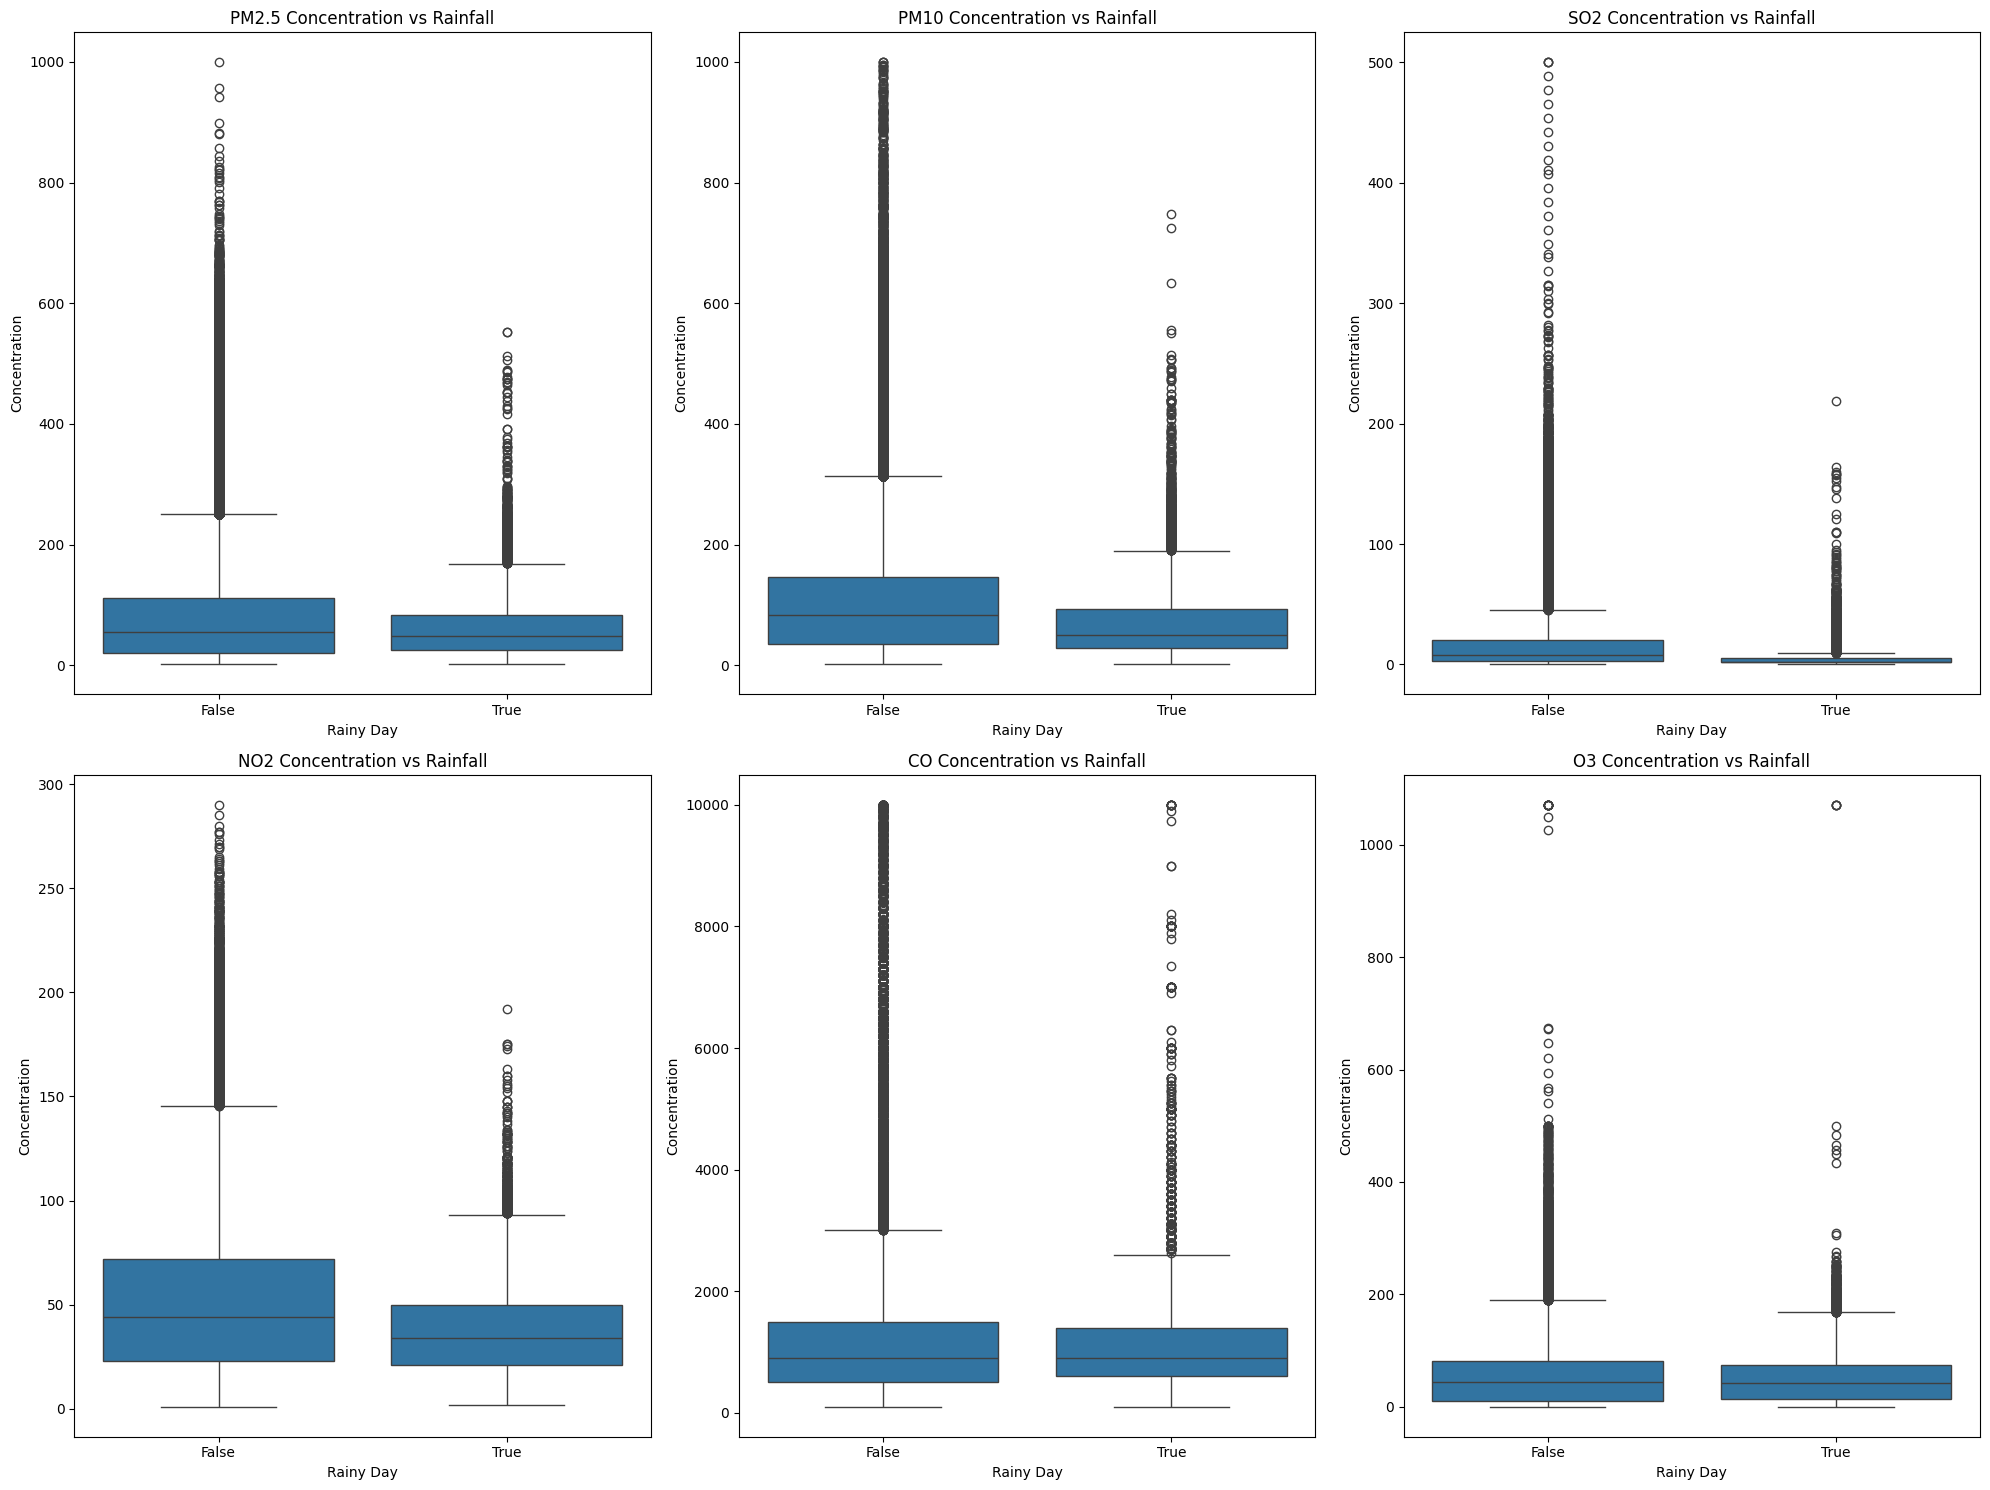

In [54]:
plt.figure(figsize=(20, 15))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_rainy', y=pollutant, data=merged_cleaned_data)
    plt.title(f'{pollutant} Concentration vs Rainfall')
    plt.xlabel('Rainy Day')
    plt.ylabel('Concentration')
plt.tight_layout()
plt.show()

> Heatmap Correlation (Data Hujan)

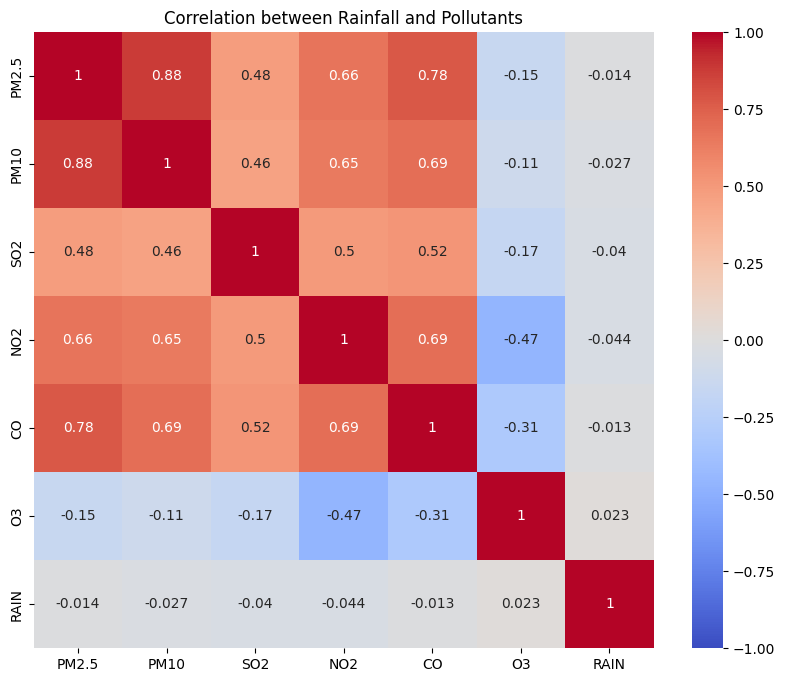

In [55]:
correlation = merged_cleaned_data[pollutants + ['RAIN']].corr()
plt.figure(figsaize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between Rainfall and Pollutants')
plt.show()

**Insight:**
- Dari hasil boxplot, terlihat bahwa tingkat polutan saat terjadi hujan cenderung lebih rendah dibandingkan dengan saat tidak hujan. Ini menunjukkan bahwa hujan dapat berperan sebagai mekanisme alamiah yang membantu mengurangi konsentrasi polutan udara.
- Analisis korelasi menunjukkan bahwa terdapat hubungan negatif yang kuat antara curah hujan dan konsentrasi PM2.5 serta PM10, dengan nilai korelasi masing-masing sebesar -0.027 dan -0.014. Hal ini menegaskan bahwa peningkatan curah hujan berhubungan dengan penurunan kadar kedua jenis polutan tersebut di udara.

## Analisis Lanjutan (Geospatial)

Geospatial

In [92]:
station_averages = merged_cleaned_data.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

station_coordinates = {
    'Aotizhongxin': (39.9522, 116.3958),
    'Changping': (40.2208, 116.2310),
    'Dingling': (40.2866, 116.2266),
    'Dongsi': (39.9289, 116.4173),
    'Guanyuan': (39.9425, 116.3612),
    'Gucheng': (39.9136, 116.1834),
    'Huairou': (40.3303, 116.6284),
    'Nongzhanguan': (39.9378, 116.4612),
    'Shunyi': (40.1255, 116.6549),
    'Tiantan': (39.8824, 116.4071),
    'Wanliu': (39.9879, 116.2873),
    'Wanshouxigong': (39.8785, 116.3520)
}

station_averages['latitude'] = station_averages['station'].map(lambda x: station_coordinates[x][0])
station_averages['longitude'] = station_averages['station'].map(lambda x: station_coordinates[x][1])

m = folium.Map(location=[39.9042, 116.4074], zoom_start=10)

pm25_values = station_averages['PM2.5'].values
norm = mcolors.Normalize(vmin=min(pm25_values), vmax=max(pm25_values))

colors = [cm.RdYlGn(1 - norm(value)) for value in pm25_values]

for idx, row in station_averages.iterrows():
    color_hex = mcolors.to_hex(colors[idx][:3])
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=8 + (row['PM2.5'] / 10),
        color='black',
        fill=True,
        fill_color=color_hex,
        fill_opacity=0.6,
        popup=f"{row['station']}: PM2.5 {row['PM2.5']:.2f} µg/m³"
    ).add_to(m)

# Display map
m


**Insight**
- Stasiun di Tengah Kota Metropolitan: Stasiun-stasiun seperti Wanshouxigong (AQI 283.33), Gucheng (AQI 278.50), dan Dongsi (AQI 276.43) terletak di tengah kota metropolitan Beijing yang padat. Tingginya tingkat polutan di lokasi-lokasi ini kemungkinan besar disebabkan oleh kepadatan penduduk, aktivitas industri, dan transportasi yang intensif, yang semuanya berkontribusi pada peningkatan emisi polutan.

- Stasiun di Pinggiran Kota: Sebaliknya, stasiun-stasiun seperti Changping (AQI 239.98), Huairou (AQI 214.50), dan Dingling (AQI 197.62) memiliki angka polutan yang lebih rendah. Hal ini dapat dijelaskan oleh lokasi mereka yang berada di pinggiran kota, di mana terdapat lebih sedikit pemukiman dan aktivitas industri dibandingkan dengan pusat kota. Jarak yang lebih jauh dari sumber emisi polutan memungkinkan stasiun-stasiun ini mencatat tingkat polusi yang lebih rendah.

## Conclusion

- Conclution pertanyaan 1 <br>
Kualitas udara di Beijing menunjukkan variasi yang signifikan antar stasiun, dengan Stasiun Wanshouxigong mencatat Indeks Kualitas Udara (AQI) tertinggi yaitu 283.33, yang menandakan kondisi polusi yang sangat buruk. Stasiun Gucheng dan Dongsi juga memiliki AQI tinggi, masing-masing 278.50 dan 276.43. Fluktuasi level polutan, seperti PM2.5 dan PM10, menunjukkan bahwa faktor lingkungan dan aktivitas manusia berkontribusi terhadap variasi konsentrasi polutan di udara.
<br>
Analisis geospasial mengungkapkan bahwa stasiun-stasiun dengan kualitas udara buruk, seperti Wanshouxigong, Gucheng, dan Dongsi, terletak di pusat kota metropolitan Beijing yang padat, sehingga angka polutan tinggi mungkin dipengaruhi oleh kepadatan penduduk dan aktivitas perkotaan. Sebaliknya, stasiun-stasiun di pinggiran kota, seperti Changping, Huairou, dan Dingling, menunjukkan tingkat polusi yang lebih rendah, kemungkinan disebabkan oleh jarak yang lebih jauh dari pusat pemukiman dan aktivitas industri. Oleh karena itu, analisis geospasial menjadi penting untuk memahami hubungan antara lokasi dan tingkat polusi yang teramati.
<br><br>
- Conclution pertanyaan 2<br>
Visualisasi data menunjukkan adanya fluktuasi signifikan dalam konsentrasi PM2.5 dan PM10 selama lima tahun terakhir, dengan puncak tertinggi terjadi pada tahun 2014. Meskipun konsentrasi PM2.5 menurun menjadi terendah pada tahun 2016 (72.08 µg/m³), angka tersebut meningkat kembali pada tahun 2017 (92.41 µg/m³). Secara konsisten, kadar PM2.5 lebih tinggi dibandingkan PM10, yang mengindikasikan bahwa partikel halus lebih dominan di lingkungan. Tingginya kadar PM2.5 ini, yang memiliki potensi dampak kesehatan yang lebih besar, menekankan pentingnya pemantauan dan pengendalian polusi udara yang lebih ketat untuk melindungi kesehatan masyarakat.
<br><br>
- Conclution pertanyaan 3<br>
Analisis boxplot menunjukkan bahwa tingkat polutan cenderung lebih rendah saat terjadi hujan dibandingkan dengan saat tidak hujan, mengindikasikan bahwa hujan berfungsi sebagai mekanisme alami yang efektif dalam mengurangi konsentrasi polutan udara. Selain itu, hasil analisis korelasi mengungkapkan adanya hubungan negatif yang kuat antara curah hujan dan konsentrasi PM2.5 serta PM10, dengan nilai korelasi masing-masing -0.027 dan -0.014. Temuan ini menegaskan bahwa peningkatan curah hujan berkontribusi terhadap penurunan kadar kedua jenis polutan di udara.